In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Parte 1
Descarga el dataset de nombre,  Winequality_red_Tarea3.csv, que incluye  mediciones a vinos, donde cada columna es una medición al vino y existe una columna de "calidad", la cual no debe ser incluida en la reducción de dimensionalidad, pero sí para generar los gráficos.

In [2]:
wine_data = pd.read_csv('../data/winequality-red-Tarea-3.csv')

In [3]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
def wine_quality_categorization(quality):
  quality = int(quality)
  if quality > 5:
    return "buena"
  else:
    return "mala"

In [7]:
wine_data["quality_category"] = wine_data["quality"].apply(wine_quality_categorization)

In [8]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mala
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,mala
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,mala
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,buena
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mala


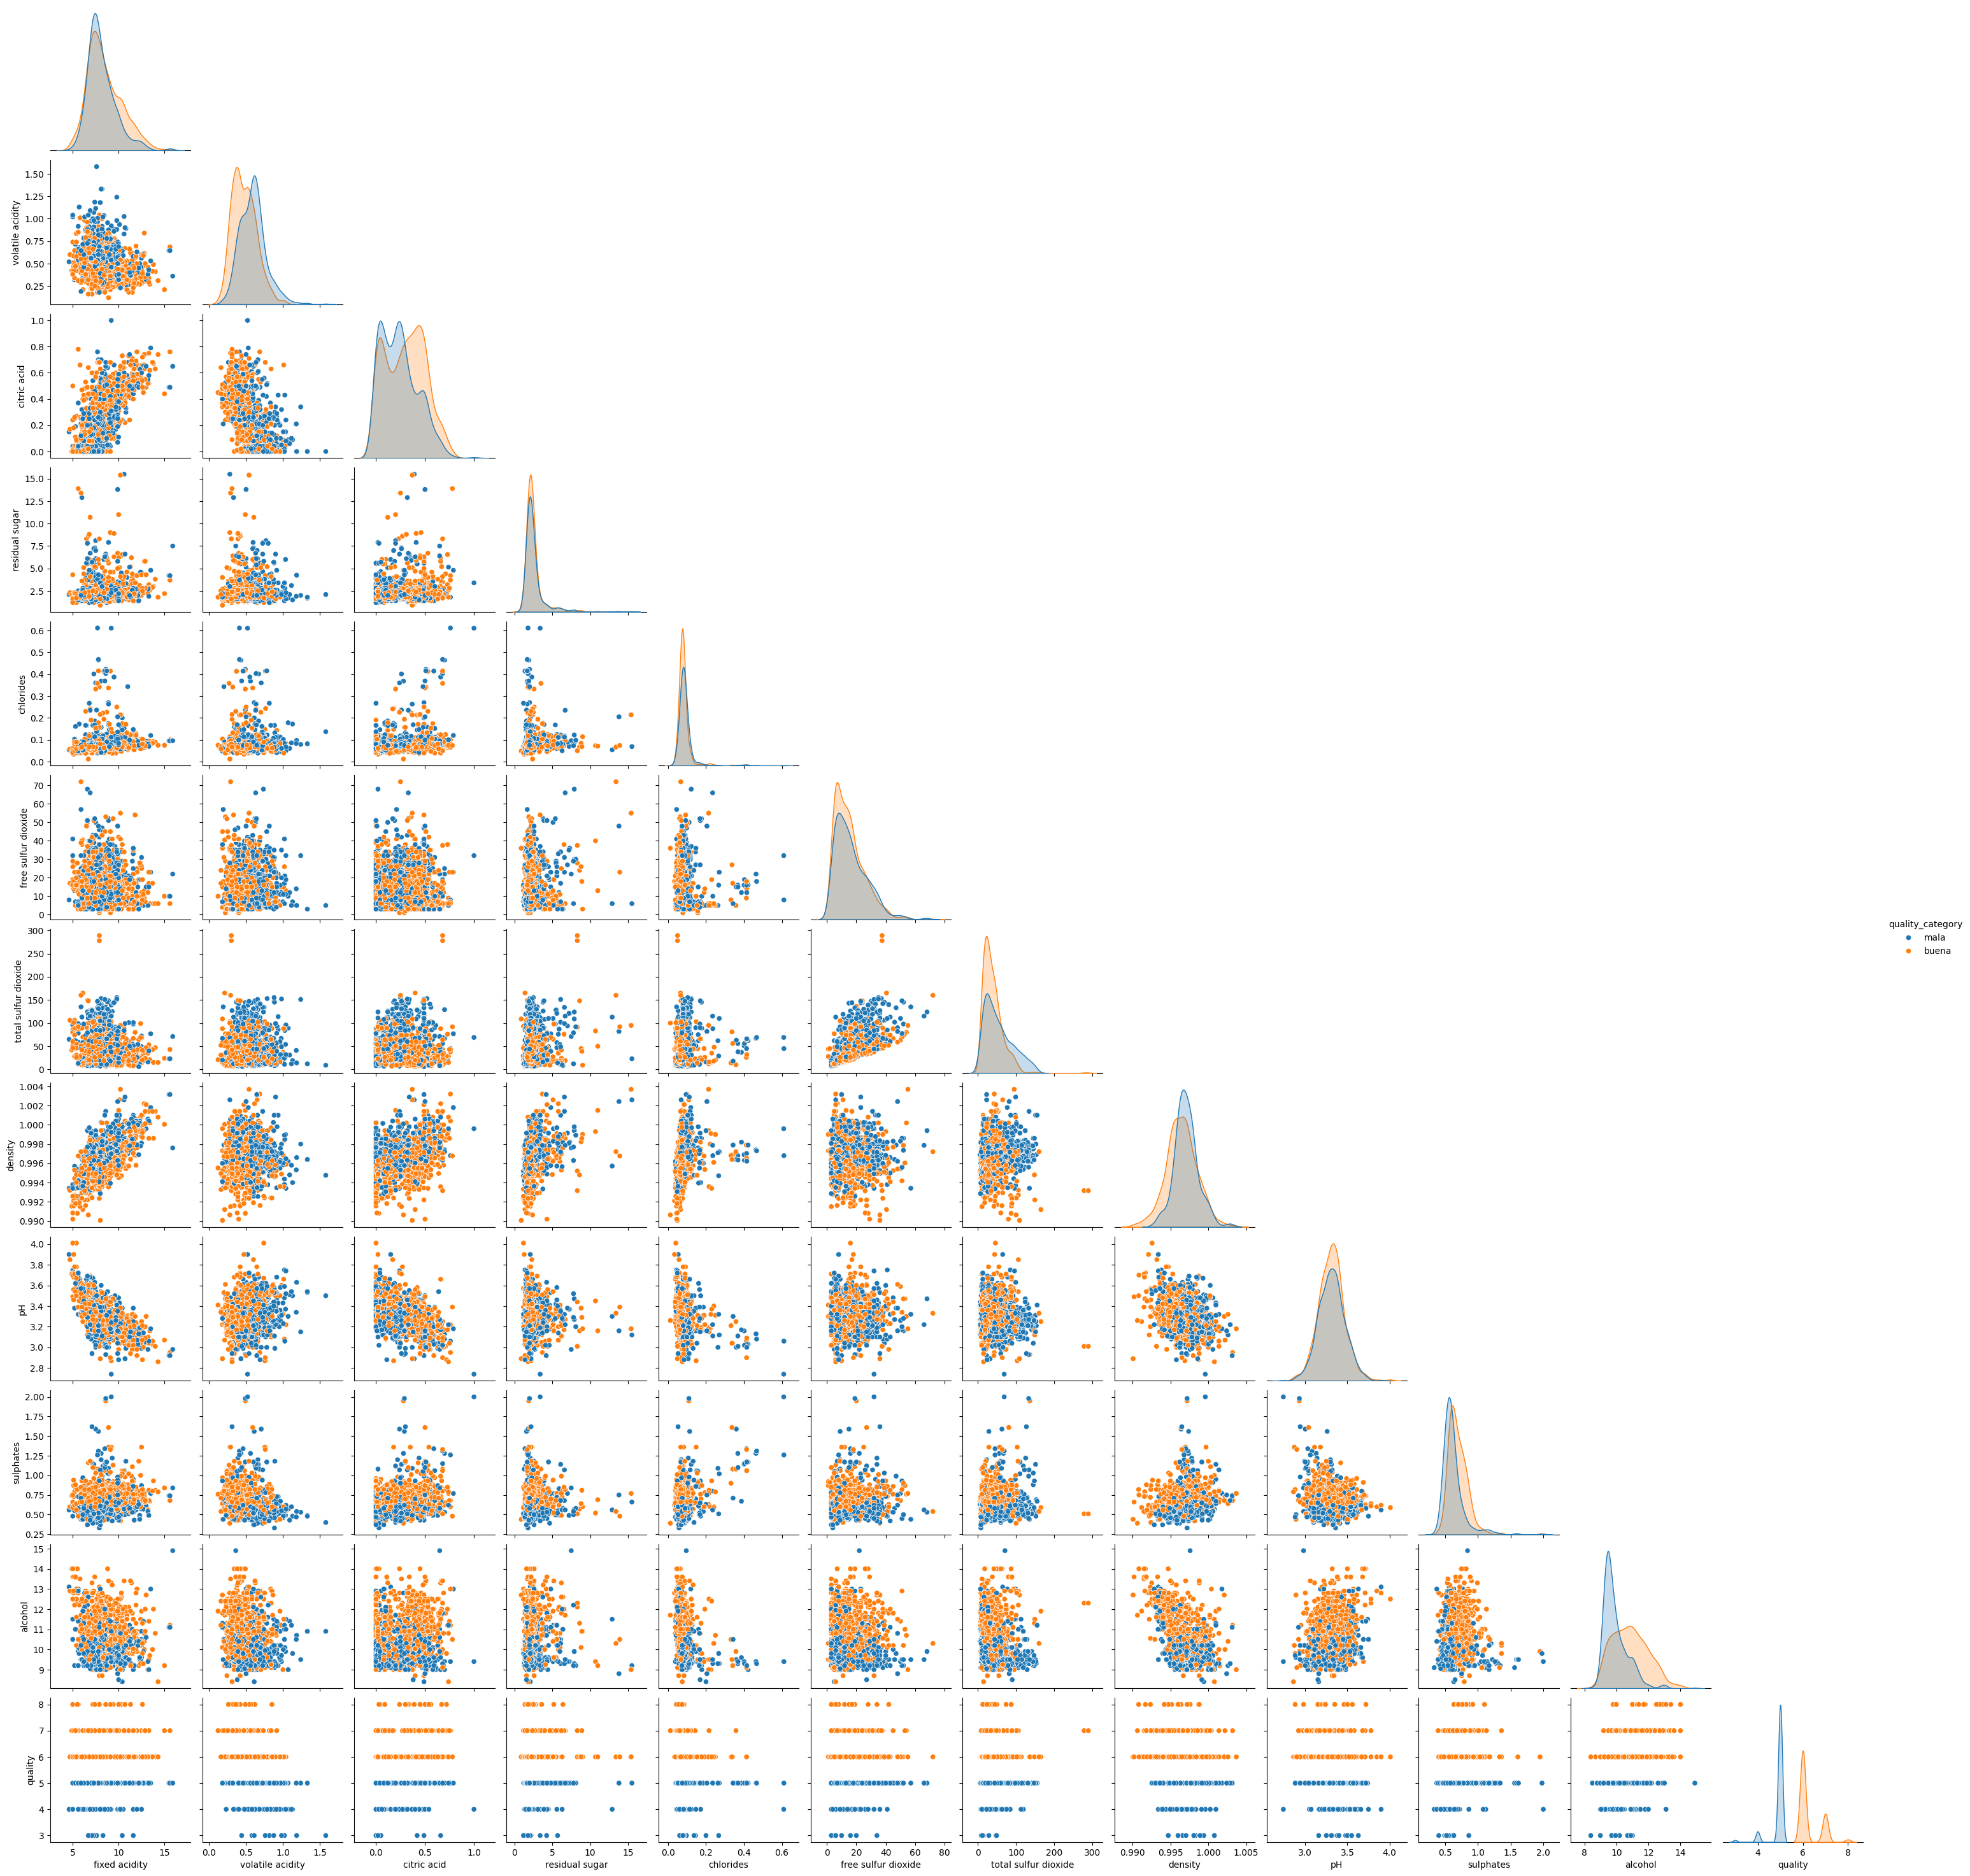

In [9]:
sns.pairplot(wine_data, hue='quality_category', corner=True)

In [10]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mala
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,mala
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,mala
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,buena
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mala


## Parte 2
Para esta actividad deberás, en primer lugar, escoger de algún modo los 5 pares de columnas que mejor separan a los vinos de mejor calidad de los de peor calidad. Un vino se dirá de buena calidad si su "quality" es mayor a 5. En esta sección se espera también que expliques tus elecciones y muestres por lo menos dos ejemplos de pares de columnas que no separen bien los datos.

#### Respuesta: Pares seleccionados que separan mejor la calidad del vino

Aunque como rasgo general se puede observar que el alcohol es un buen predictor interesante a la hora de analizar la calidad del vino. El Par
1. **alcohol / fixed acidity** muestra en el grafico una separación bastante clara entre vinos de baja y buena calidad. Similar caso puede decirse del par
2. **alcohol / density** y
3. **alcohol / ph**
4. Por otro lado, **fixed acidity / sulphates** es también un par que permite separar los vinos. También puede observarse una separación entre
5. **residual sugar / sulphates**

En general, y teniendo en cuenta lo observado por el grafico se puede notar que la **acidez, azúcar y alcohol** son elementos interesantes a tener en cuenta para el análisis de la calidad de un vino. El próximo paso para seguir tiene que ver con afinar la relación entre las variables.

#### Pares que no separan bien los datos.

Los pares que no separan bien los datos son
1. pH/fixed acidity
2. free sulfur dioxide / residual sugar

##### 1 - Gráficos relacion pH/fixed acidity

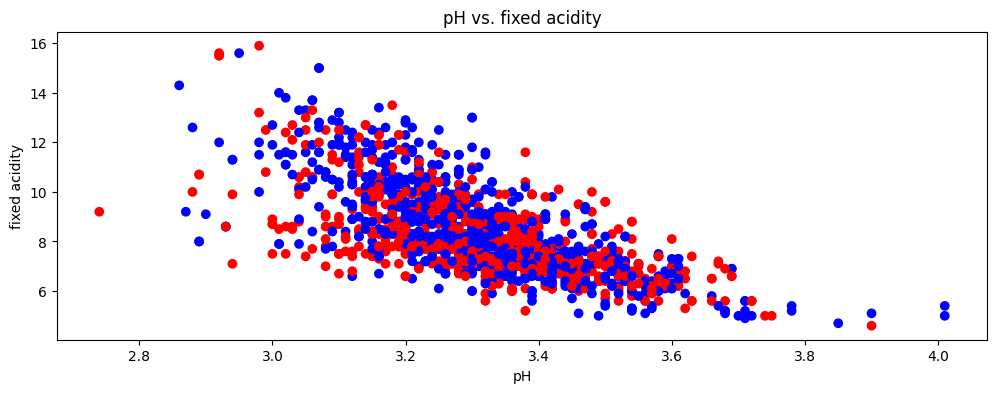

In [11]:
x = wine_data['pH']
y = wine_data['fixed acidity']
hue = wine_data['quality_category']
plt.figure(figsize=(12, 4))
plt.scatter(x, y, c=hue.map({'buena': 'blue', 'mala': 'red'}))
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.title('pH vs. fixed acidity')
plt.show()

#### 2. free sulfur dioxide / residual sugar

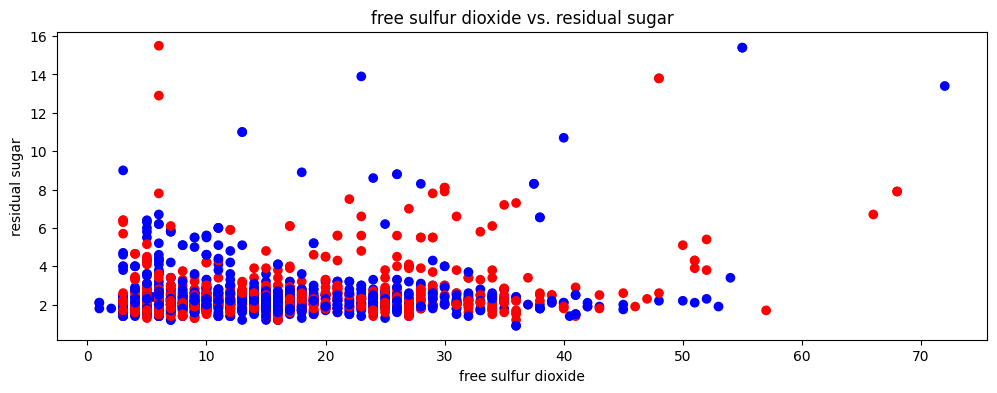

In [12]:
x = wine_data['free sulfur dioxide']
y = wine_data['residual sugar']
hue = wine_data['quality_category']
plt.figure(figsize=(12, 4))
plt.scatter(x, y, c=hue.map({'buena': 'blue', 'mala': 'red'}))
plt.xlabel('free sulfur dioxide')
plt.ylabel('residual sugar')
plt.title('free sulfur dioxide vs. residual sugar')
plt.show()

Analisis comparado  tienen distribucion igual y misma densidad

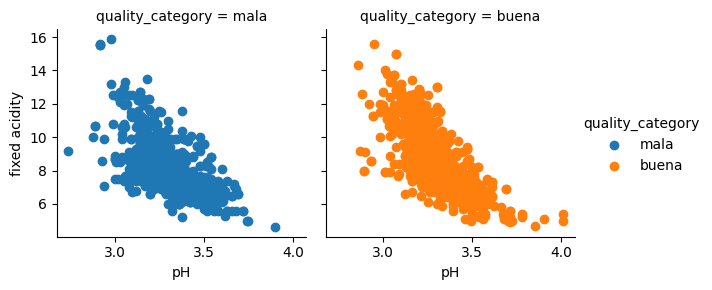

In [13]:
g = sns.FacetGrid(wine_data, col="quality_category", hue="quality_category")
g.map(plt.scatter, "pH", "fixed acidity")
g.add_legend()
plt.show()

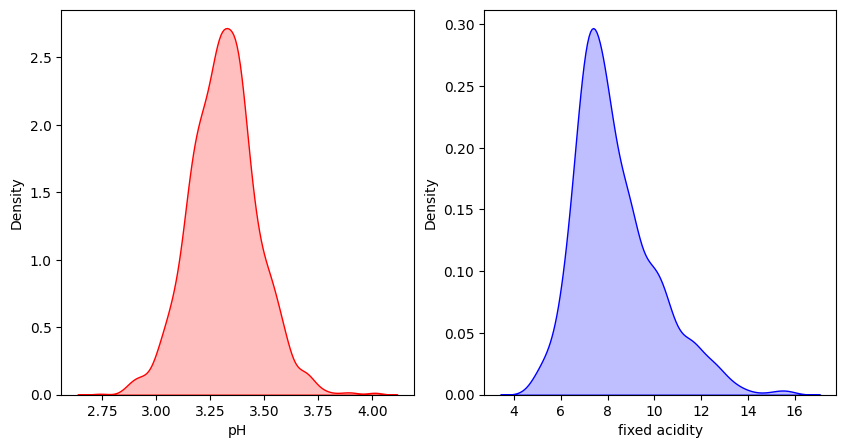

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(data=wine_data.pH, ax=axs[0], color="red", fill=True)
sns.kdeplot(data=wine_data['fixed acidity'], ax=axs[1], color="blue", fill=True)
plt.show()

# Parte 3:
Luego de esto, deberás usar los métodos de reducción de dimensionalidad lineal y no lineal conocidos para reducir la cantidad de columnas para poder visualizar los datos. Esperamos que para cada uno de estos métodos muestres la separación entre calidades (cada calidad por separado) y la separación entre vinos buenos y malos. Esperamos también que explique sus resultados y te explayes con detalle sobre la significancia de sus resultados.

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Metodo 1 - Reduccion lineal PCA

In [16]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mala
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,mala
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,mala
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,buena
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,mala


In [17]:
numeric_df = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_category']]

In [18]:
numeric_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,mala
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,mala
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,mala
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,buena
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,mala


In [19]:
X = numeric_df.to_numpy()[:,:11]
X

array([[7.4, 0.7, 0.0, ..., 3.51, 0.56, 9.4],
       [7.8, 0.88, 0.0, ..., 3.2, 0.68, 9.8],
       [7.8, 0.76, 0.04, ..., 3.26, 0.65, 9.8],
       ...,
       [6.3, 0.51, 0.13, ..., 3.42, 0.75, 11.0],
       [5.9, 0.645, 0.12, ..., 3.57, 0.71, 10.2],
       [6.0, 0.31, 0.47, ..., 3.39, 0.66, 11.0]], dtype=object)

Text(0.5, 1.0, 'PCA')

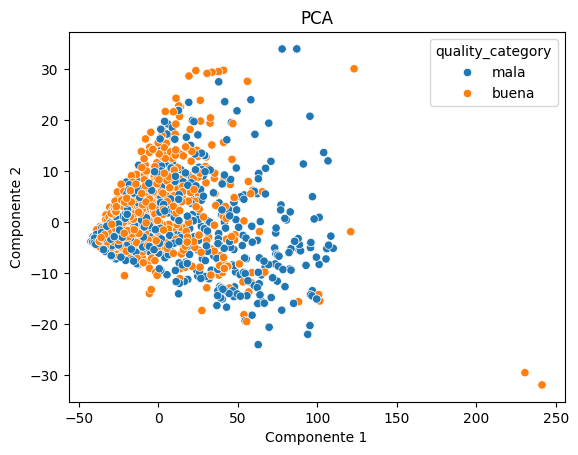

In [20]:
pca = PCA(2)
X_r = pca.fit(X).transform(X)
data = pd.DataFrame(X_r)
data['quality_category'] = numeric_df["quality_category"]
fig = sns.scatterplot(data=data, x = 0, y= 1, hue="quality_category")
fig.set_xlabel("Componente 1")
fig.set_ylabel("Componente 2")
fig.set_title("PCA")

#### Metodo 2 - Reduccion no lineal T-SNE  

In [23]:
numeric_df_2.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Text(0.5, 1.0, 'T-SNE')

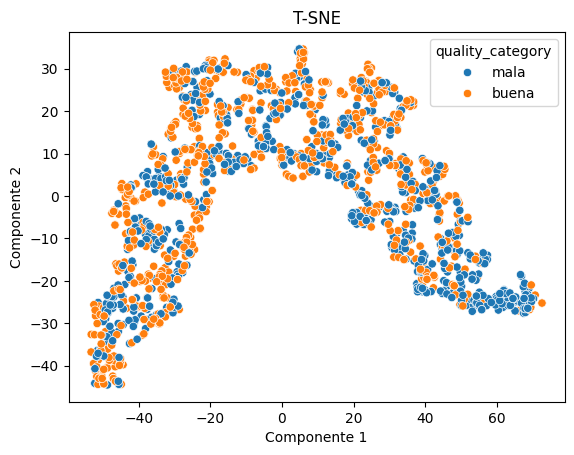

In [22]:
numeric_df_2 = numeric_df.drop("quality_category", axis= 1)
tsne = TSNE(2)
X = tsne.fit_transform(numeric_df_2)
data = pd.DataFrame(X)
data['quality_category'] = numeric_df["quality_category"]
fig = sns.scatterplot(data=data, x = 0, y= 1, hue="quality_category")
fig.set_xlabel("Componente 1")
fig.set_ylabel("Componente 2")
fig.set_title("T-SNE")

#### Explicacion:
Con un primer acercamiento con los métodos PCA y T-SNE se puede observar que no existe una forma clara de separación de los datos. Este primer acercamiento invita a seguir refinando el uso de variables, por ejemplo, quitando free sulfur dioxide para ver si la separación es más clara. PCA es el que se muestra más prometedor en un prime vistazo